In [20]:
import os
import matplotlib.pyplot as plt
from zipfile import ZipFile
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image             
from keras_preprocessing.image import ImageDataGenerator  
import numpy as np
os.environ['CONFIG_DIR'] ="datasetfix"

In [21]:
pwd

'd:\\Orbit\\Studi Independen\\Project Akhir\\sign-language'

In [22]:
%cd datasetfix

d:\Orbit\Studi Independen\Project Akhir\sign-language\datasetfix


## Preprocessing

In [23]:
# Unzip

with ZipFile('SignLanguageDataset.zip', 'r') as zipObj:
    zipObj.extractall()

In [24]:
SignLanguageDetection = os.path.join('../datasetfix/SignLanguageDataset')
print(os.listdir(SignLanguageDetection))

['01', '02', '03', '04', '05', '06', '07', '08', '09', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [25]:
len(os.listdir(SignLanguageDetection))

35

In [26]:
SignLanguageDetection=['01', '02', '03', '04', '05', '06', '07', '08', '09', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [27]:
for signlanguage in SignLanguageDetection:
    print(f'{signlanguage} images: ', len(os.listdir(f'../datasetfix/SignLanguageDataset/{signlanguage}')))

01 images:  20
02 images:  20
03 images:  20
04 images:  20
05 images:  20
06 images:  20
07 images:  20
08 images:  20
09 images:  20
A images:  20
B images:  20
C images:  20
D images:  20
E images:  20
F images:  20
G images:  20
H images:  20
I images:  20
J images:  20
K images:  20
L images:  20
M images:  20
N images:  20
O images:  20
P images:  20
Q images:  20
R images:  20
S images:  20
T images:  20
U images:  20
V images:  20
W images:  20
X images:  20
Y images:  20
Z images:  20


### Image data generator

In [28]:
BASIS_DIR = "../datasetfix/SignLanguageDataset/"
training_datagen = ImageDataGenerator(
    rescale = 1./255, 
    rotation_range=40,     
    width_shift_range=0.2,  
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,  
    horizontal_flip=True,  
    fill_mode='nearest', 
    validation_split=0.2  
)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
train_generator = training_datagen.flow_from_directory( 
    BASIS_DIR,  
    target_size=(150,150), 
    class_mode='categorical', 
    shuffle=True,                                                                  
    subset='training',
    batch_size=32
)

validation_generator = training_datagen.flow_from_directory(      
    BASIS_DIR,     
    target_size=(150,150),      
    class_mode='categorical',
    shuffle=True,
    subset='validation',
    batch_size=32
)

Found 560 images belonging to 35 classes.
Found 140 images belonging to 35 classes.


In [30]:
# Show the first batch of images

for batch, labels in train_generator:
    print(batch.shape)
    print(labels.shape)
    break
    
print()

for batch, labels in validation_generator:
    print(batch.shape)
    print(labels.shape)
    break

(32, 150, 150, 3)
(32, 35)

(32, 150, 150, 3)
(32, 35)


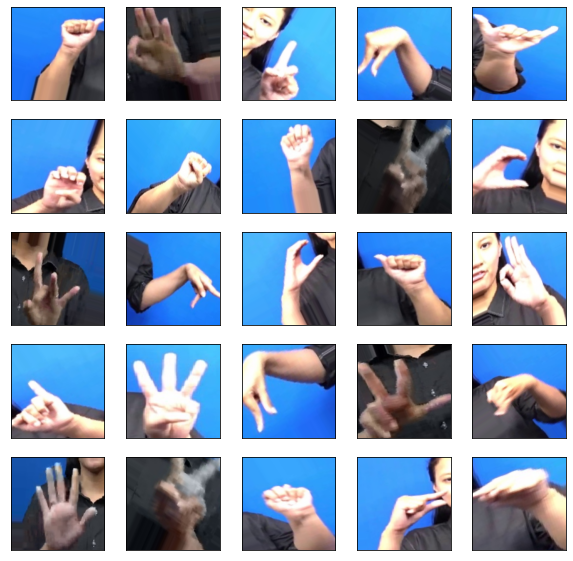

In [31]:
# Show images

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(batch[i], cmap=plt.cm.binary)

## Modeling: CNN

In [32]:
# Adam
Adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

# RMSprop
RMSprop = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.7, epsilon=1e-08, decay=0.0)

### Optimizer Adam

In [74]:
model1 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(35, activation='softmax')
         ])

model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 17, 17, 128)    

In [75]:
STEP_PER_EPOCH = train_generator.n // train_generator.batch_size
VAlIDATION_STEPS = validation_generator.n // validation_generator.batch_size
EPOCHS = STEP_PER_EPOCH * 3
print(EPOCHS)
print(STEP_PER_EPOCH)

51
17


In [77]:
%%time
model1.compile(loss='categorical_crossentropy', optimizer=Adam, metrics=['accuracy'])
history1 = model1.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator, validation_steps=VAlIDATION_STEPS, verbose=1)

Epoch 1/51
18/18 [==============================] - 41s 2s/step - loss: 3.5589 - accuracy: 0.0179 - val_loss: 3.5462 - val_accuracy: 0.0234
Epoch 2/51
18/18 [==============================] - 36s 2s/step - loss: 3.5403 - accuracy: 0.0464 - val_loss: 3.5166 - val_accuracy: 0.0703
Epoch 3/51
18/18 [==============================] - 36s 2s/step - loss: 3.4784 - accuracy: 0.0589 - val_loss: 3.3809 - val_accuracy: 0.0781
Epoch 4/51
18/18 [==============================] - 37s 2s/step - loss: 3.2487 - accuracy: 0.0625 - val_loss: 3.1724 - val_accuracy: 0.1250
Epoch 5/51
18/18 [==============================] - 36s 2s/step - loss: 3.0932 - accuracy: 0.0911 - val_loss: 2.9248 - val_accuracy: 0.0859
Epoch 6/51
18/18 [==============================] - 36s 2s/step - loss: 2.9389 - accuracy: 0.1179 - val_loss: 3.0477 - val_accuracy: 0.1250
Epoch 7/51
18/18 [==============================] - 36s 2s/step - loss: 2.8505 - accuracy: 0.1518 - val_loss: 2.6962 - val_accuracy: 0.1797
Epoch 8/51
18/18 [==

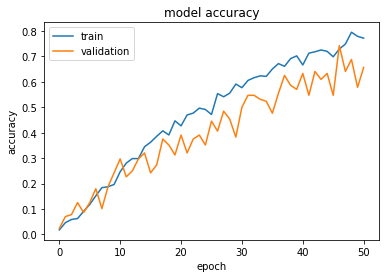

In [17]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

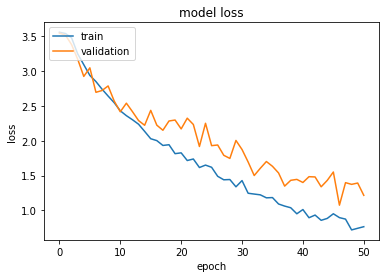

In [18]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Optimizer RMSprop

In [19]:
model3 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(35, activation='softmax')
         ])

In [20]:
%%time
model3.compile(loss='categorical_crossentropy', optimizer=RMSprop , metrics=['accuracy'])
history3 = model3.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator, validation_steps=VAlIDATION_STEPS, verbose=1)

Epoch 1/51
18/18 [==============================] - 48s 3s/step - loss: 3.6073 - accuracy: 0.0143 - val_loss: 3.4752 - val_accuracy: 0.0703
Epoch 2/51
18/18 [==============================] - 44s 2s/step - loss: 3.5559 - accuracy: 0.0411 - val_loss: 3.4725 - val_accuracy: 0.0625
Epoch 3/51
18/18 [==============================] - 46s 3s/step - loss: 3.3210 - accuracy: 0.0750 - val_loss: 3.0543 - val_accuracy: 0.0625
Epoch 4/51
18/18 [==============================] - 53s 3s/step - loss: 3.2232 - accuracy: 0.0607 - val_loss: 3.0896 - val_accuracy: 0.0625
Epoch 5/51
18/18 [==============================] - 43s 2s/step - loss: 3.1188 - accuracy: 0.0964 - val_loss: 2.9345 - val_accuracy: 0.0859
Epoch 6/51
18/18 [==============================] - 40s 2s/step - loss: 2.9135 - accuracy: 0.1286 - val_loss: 3.5092 - val_accuracy: 0.1016
Epoch 7/51
18/18 [==============================] - 40s 2s/step - loss: 2.9142 - accuracy: 0.1018 - val_loss: 2.8267 - val_accuracy: 0.1562
Epoch 8/51
18/18 [==

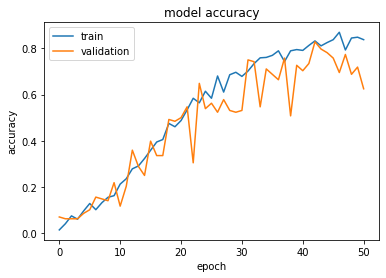

In [21]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

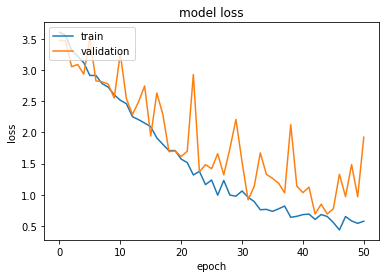

In [22]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Modeling: Transfer Learning MobileNetV2

In [23]:
img_size = 160
img_shape = (img_size, img_size, 3)

model_mobilenetV2 = tf.keras.applications.MobileNetV2(input_shape=img_shape, include_top=False, weights='imagenet')
model_mobilenetV2.trainable = False

### Optimizer RMSProp

In [24]:
mobilenetV2_model = tf.keras.models.Sequential([
                        model_mobilenetV2,
                        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(512, activation='relu'),
                        tf.keras.layers.Dense(64, activation='relu'),
                        tf.keras.layers.Dense(35, activation='softmax')
                    ])

mobilenetV2_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d_10 (Conv2D)          (None, 3, 3, 16)          184336    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 1, 1, 16)         0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 512)               8704      
                                                                 
 dense_5 (Dense)             (None, 64)               

In [25]:
%%time
mobilenetV2_model.compile(loss='categorical_crossentropy', optimizer=RMSprop , metrics=['accuracy'])
history4 = mobilenetV2_model.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator, validation_steps=VAlIDATION_STEPS, verbose=1)


Epoch 1/51
18/18 [==============================] - 41s 2s/step - loss: 3.3931 - accuracy: 0.0821 - val_loss: 3.3286 - val_accuracy: 0.0703
Epoch 2/51
18/18 [==============================] - 28s 2s/step - loss: 2.6735 - accuracy: 0.2321 - val_loss: 2.0859 - val_accuracy: 0.2969
Epoch 3/51
18/18 [==============================] - 26s 1s/step - loss: 1.9606 - accuracy: 0.3786 - val_loss: 1.8633 - val_accuracy: 0.4453
Epoch 4/51
18/18 [==============================] - 27s 1s/step - loss: 1.4544 - accuracy: 0.5339 - val_loss: 1.5248 - val_accuracy: 0.4922
Epoch 5/51
18/18 [==============================] - 26s 1s/step - loss: 1.2477 - accuracy: 0.5768 - val_loss: 1.4221 - val_accuracy: 0.5000
Epoch 6/51
18/18 [==============================] - 29s 2s/step - loss: 1.0411 - accuracy: 0.6625 - val_loss: 1.1315 - val_accuracy: 0.5938
Epoch 7/51
18/18 [==============================] - 27s 1s/step - loss: 0.8630 - accuracy: 0.6982 - val_loss: 1.1127 - val_accuracy: 0.6094
Epoch 8/51
18/18 [==

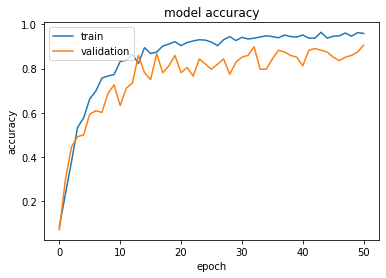

In [26]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

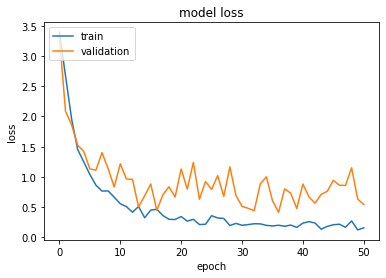

In [27]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Optimizer Adam

In [28]:
mobilenetV2_model2 = tf.keras.models.Sequential([
                        model_mobilenetV2,
                        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(512, activation='relu'),
                        tf.keras.layers.Dense(64, activation='relu'),
                        tf.keras.layers.Dense(35, activation='softmax')
                     ])

In [29]:
%%time
mobilenetV2_model2.compile(loss='categorical_crossentropy', optimizer=Adam, metrics=['accuracy'])
history5 = mobilenetV2_model2.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator, validation_steps=VAlIDATION_STEPS, verbose=1)

Epoch 1/51
18/18 [==============================] - 28s 1s/step - loss: 3.4070 - accuracy: 0.0643 - val_loss: 3.0718 - val_accuracy: 0.1172
Epoch 2/51
18/18 [==============================] - 20s 1s/step - loss: 2.6158 - accuracy: 0.2536 - val_loss: 2.3473 - val_accuracy: 0.3047
Epoch 3/51
18/18 [==============================] - 19s 1s/step - loss: 1.8667 - accuracy: 0.4250 - val_loss: 1.8462 - val_accuracy: 0.4844
Epoch 4/51
18/18 [==============================] - 19s 1s/step - loss: 1.3602 - accuracy: 0.6179 - val_loss: 1.5370 - val_accuracy: 0.5703
Epoch 5/51
18/18 [==============================] - 21s 1s/step - loss: 0.9855 - accuracy: 0.7339 - val_loss: 1.2036 - val_accuracy: 0.6172
Epoch 6/51
18/18 [==============================] - 17s 946ms/step - loss: 0.7886 - accuracy: 0.7625 - val_loss: 1.1682 - val_accuracy: 0.6641
Epoch 7/51
18/18 [==============================] - 17s 952ms/step - loss: 0.6203 - accuracy: 0.8357 - val_loss: 1.0110 - val_accuracy: 0.7188
Epoch 8/51
18/

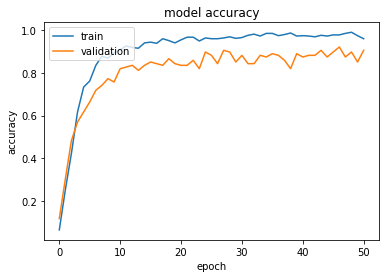

In [30]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

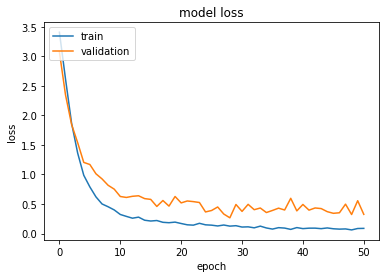

In [31]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## saving model

In [32]:
#save model
model1.save('../model/model1.h5') #cnn adam
model3.save('../model/model3.h5') #cnn rmsprop
mobilenetV2_model.save('../model/mobilenetV2_model.h5') #mobilenetV2 rmsprop
mobilenetV2_model2.save('../model/mobilenetV2_model2.h5') #mobilenetV2 adam


## load model

In [33]:
model1 = tf.keras.models.load_model('../model/model1.h5') #cnn adam
model2 = tf.keras.models.load_model('../model/model3.h5') #cnn rmsprop
model3 = tf.keras.models.load_model('../model/mobilenetV2_model.h5') #mobilenetV2 rmsprop
model4 = tf.keras.models.load_model('../model/mobilenetV2_model2.h5') #mobilenetV2 adam


[1.3278248310089111, 0.6714285612106323]

In [34]:
model1.evaluate(validation_generator)

5/5 [==============================] - 4s 612ms/step - loss: 1.2942 - accuracy: 0.6857


[1.2941503524780273, 0.6857143044471741]

In [35]:
model2.evaluate(validation_generator)

5/5 [==============================] - 4s 626ms/step - loss: 2.2871 - accuracy: 0.5214


[2.2870616912841797, 0.5214285850524902]

In [36]:
model3.evaluate(validation_generator)

5/5 [==============================] - 5s 755ms/step - loss: 0.8976 - accuracy: 0.8643


[0.8975864052772522, 0.8642857074737549]

In [37]:
model4.evaluate(validation_generator)

5/5 [==============================] - 5s 672ms/step - loss: 0.2870 - accuracy: 0.8786


[0.28696221113204956, 0.8785714507102966]